# Tweet Sentiment Classifier
<h4>Blake Rayvid - <a href=https://github.com/brayvid>https://github.com/brayvid</a></h4>

# Business problem
<h3><u>Brand reputation management</u></h3>
<h5>Being able to correctly classify new tweets by sentiment (positive, negative, neutral) allows a company to monitor the overall public perception of their brand.</h5>
<ul>
<li>Analyze negative feedback for insights into product weaknesses and use this to drive improvements.
<li>Identify accounts with consistent positive sentiment and offer to collaborate.
<li>Time launches of new products during periods of high positive sentiment.
</ul>


# Imports

In [42]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt; plt.rcParams["figure.dpi"] = 144
import seaborn as sns

from sklearn.preprocessing import LabelEncoder
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split, KFold
from sklearn.metrics import accuracy_score, classification_report, ConfusionMatrixDisplay

from wordcloud import WordCloud
from matplotlib.patches import Patch

# Dataset
<h4><a href="https://www.kaggle.com/datasets/yasserh/twitter-tweets-sentiment-dataset">https://www.kaggle.com/datasets/yasserh/twitter-tweets-sentiment-dataset</a></h4>
<ul>
<li>three classes: <code>positive</code>, <code>negative</code>, <code>neutral</code> in column called <code>sentiment</code>.
<li>27,000 tweets formatted as strings in <code>text</code> column.
<li><code>selected_text</code> is an additional column containing the substring of the tweet relevant to classification.
</ul>


In [101]:
df = pd.read_csv('Tweets.csv')
df = df.dropna() # only one row is dropped
df.sample(10, random_state=42)[['sentiment','text','selected_text']]
sentiments = ['negative', 'neutral','positive']

# Model selection

In [96]:
# Get X (tweets) and y (labels)
labenc = LabelEncoder()
labels = labenc.fit_transform(df['sentiment'])
tweets = df['selected_text']

# Train test split
X_train, X_test, y_train, y_test = train_test_split(tweets, labels, test_size=0.3, random_state=42, stratify=labels)

# Vectorize the tweets
vectorizer = TfidfVectorizer()
X_train_vec = vectorizer.fit_transform(X_train)
X_test_vec = vectorizer.transform(X_test)

## Decision Tree Classifer

Tree depth: 10
Train accuracy: 0.5879080889997921
Test accuracy: 0.5702328966521106
Classification Report:
               precision    recall  f1-score   support

           0       0.41      0.86      0.55      2334
           1       0.77      0.60      0.67      3335
           2       0.92      0.28      0.43      2575

    accuracy                           0.57      8244
   macro avg       0.70      0.58      0.55      8244
weighted avg       0.72      0.57      0.56      8244



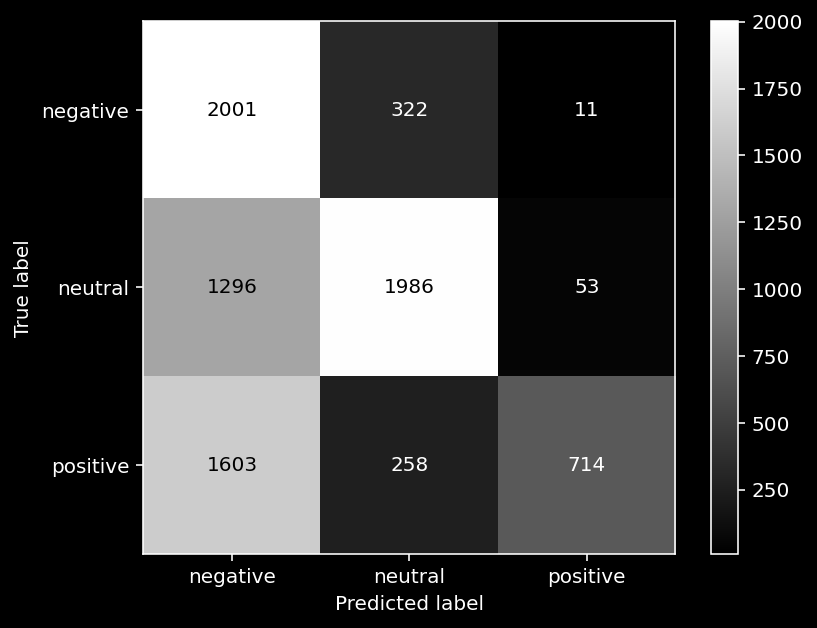

In [97]:
# Fit Decision Tree
clf = DecisionTreeClassifier(max_depth=10)
clf.fit(X_train_vec, y_train)

# Predict and evaluate
y_pred = clf.predict(X_test_vec)
print("Tree depth:", clf.get_depth())
print("Train accuracy:", clf.score(X_train_vec,y_train))
print("Test accuracy:", accuracy_score(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))

# Plot confusion matrix
plt.style.use("dark_background")
ConfusionMatrixDisplay.from_estimator(clf, X_test_vec, y_test, display_labels=sentiments, cmap='gray')
plt.show()

## Random Forest Classifier

Train accuracy: 0.5898315658140986
Test accuracy: 0.5822416302765647
Classification Report:
               precision    recall  f1-score   support

           0       0.97      0.16      0.27      2334
           1       0.50      0.99      0.66      3335
           2       0.95      0.44      0.60      2575

    accuracy                           0.58      8244
   macro avg       0.80      0.53      0.51      8244
weighted avg       0.77      0.58      0.53      8244



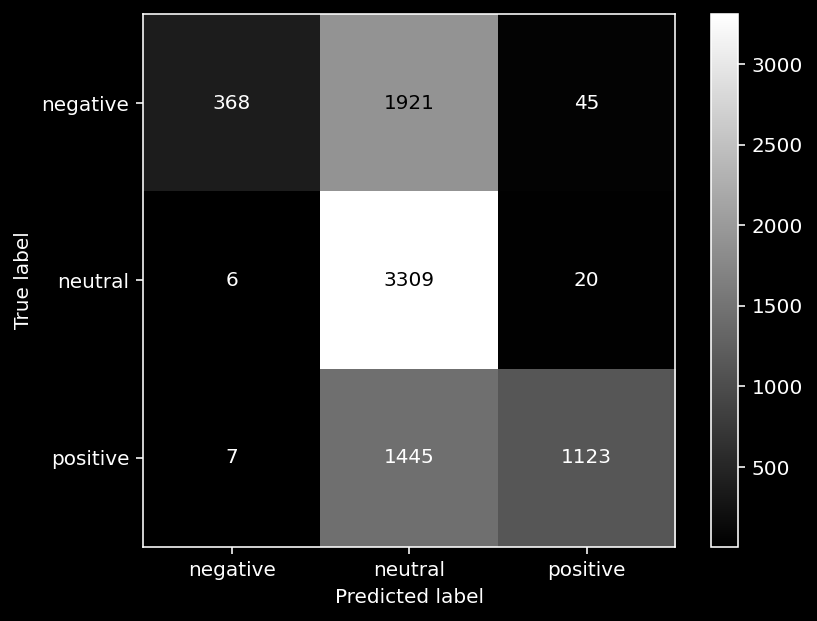

In [98]:
# Fit Random Forest Classifier
rfc = RandomForestClassifier(max_depth=10)
rfc.fit(X_train_vec, y_train)

# Predict and evaluate
y_pred = rfc.predict(X_test_vec)
print("Train accuracy:", rfc.score(X_train_vec,y_train))
print("Test accuracy:", accuracy_score(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))

# Plot confusion matrix
plt.style.use("dark_background")
ConfusionMatrixDisplay.from_estimator(rfc, X_test_vec, y_test, display_labels=sentiments, cmap='gray')
plt.show()

## Naive Bayes Classifier

Train accuracy: 0.8526200873362445
Test accuracy: 0.7785055798156235
Classification Report:
               precision    recall  f1-score   support

           0       0.92      0.57      0.71      2334
           1       0.67      0.96      0.79      3335
           2       0.93      0.73      0.82      2575

    accuracy                           0.78      8244
   macro avg       0.84      0.75      0.77      8244
weighted avg       0.82      0.78      0.78      8244



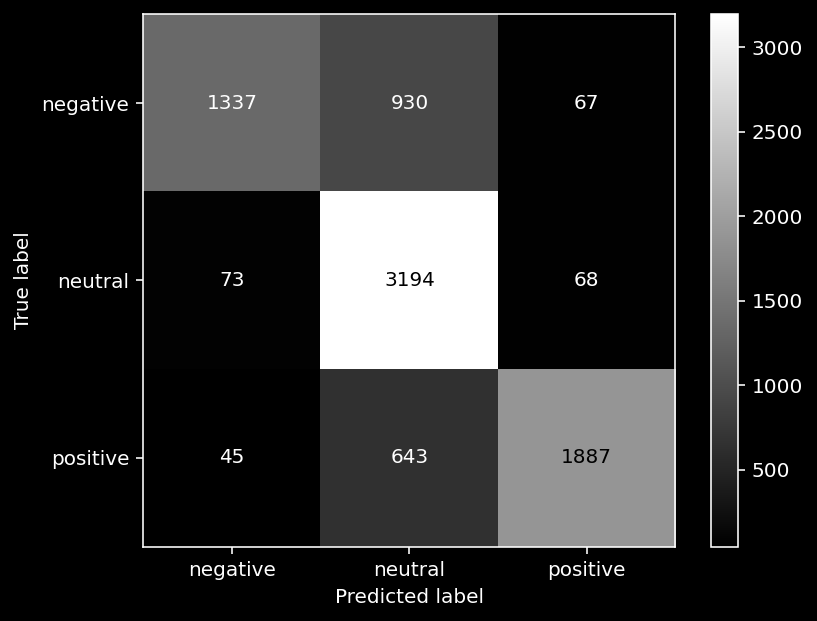

In [99]:
# Fit Naive Bayes classifier
est = MultinomialNB()
est.fit(X_train_vec, y_train)

# Predict and evaluate
y_pred = est.predict(X_test_vec)
print("Train accuracy:", est.score(X_train_vec,y_train))
print("Test accuracy:", accuracy_score(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))

# Plot confusion matrix
plt.style.use("dark_background")
ConfusionMatrixDisplay.from_estimator(est, X_test_vec, y_test, display_labels=sentiments, cmap='gray')
plt.show()

## Support Vector Classifier ⭐️

Train accuracy: 0.963297982948638
Test accuracy: 0.834061135371179
Classification Report:
               precision    recall  f1-score   support

           0       0.83      0.77      0.80      2334
           1       0.78      0.91      0.84      3335
           2       0.93      0.80      0.86      2575

    accuracy                           0.83      8244
   macro avg       0.85      0.82      0.83      8244
weighted avg       0.84      0.83      0.83      8244



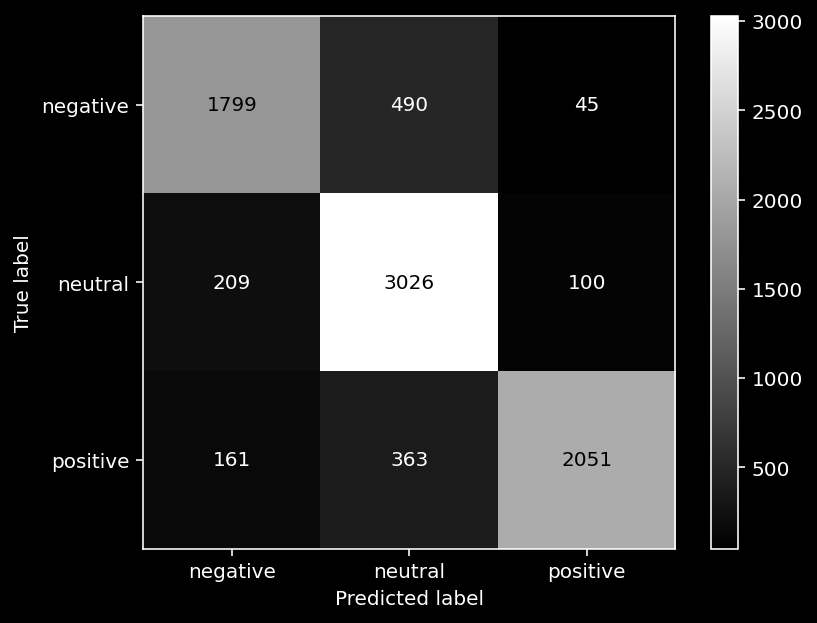

In [100]:
# Fit Support Vector Classifier (slow)
est = SVC()
est.fit(X_train_vec, y_train)

# Predict and evaluate
y_pred = est.predict(X_test_vec)
print("Train accuracy:", est.score(X_train_vec,y_train))
print("Test accuracy:", accuracy_score(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))

# Plot confusion matrix
plt.style.use("dark_background")
ConfusionMatrixDisplay.from_estimator(est, X_test_vec, y_test, display_labels=sentiments, cmap='gray')
plt.show()

### Cross validation tuning

In [ ]:
def cross_validation_svc(X_train, y_train, k, num_split = 10):

    X_train = X_train.values
    # y_train = y_train.values

    score_train_list = []
    score_val_list = []

    for train_index, valid_index in KFold(n_splits = num_split).split(X_train):

        # train and validation splitting
        X_train_fold, X_val_fold = X_train[train_index], X_train[valid_index]
        y_train_fold, y_val_fold = y_train[train_index], y_train[valid_index]

        # Vectorizing the data
        vectorizer = TfidfVectorizer()
        X_train_fold_vec = vectorizer.fit_transform(X_train_fold)
        X_val_fold_vec = vectorizer.transform(X_val_fold)

        # create/fit SVC
        clf = SVC(gamma = k)
        clf.fit(X_train_fold_vec, y_train_fold)

        # How did we do?
        accuracy_train = clf.score(X_train_fold_vec, y_train_fold)
        accuracy_val = clf.score(X_val_fold_vec, y_val_fold)
        score_val_list.append(accuracy_val)
        score_train_list.append(accuracy_train)

    return {'k': k, 'train': np.mean(score_train_list), 'validation': np.mean(score_val_list)}

In [ ]:
# Append results for each value of k
crossval_list = [pd.Series(cross_validation_svc(X_train, y_train, k, 5)) for k in (np.logspace(-3, 2, 6)).astype(int)]
cross_val_df = pd.concat(crossval_list, axis = 1).T

# Plot cross validation results
fig, ax = plt.subplots()
sns.lineplot(x = 'k', y = 'train',
             data = cross_val_df,
             ax = ax, label = 'train')
sns.lineplot(x = 'k', y = 'validation',
             data = cross_val_df,
             ax = ax, label = 'validation')
ax.set_ylabel('Accuracy')
ax.set_title('5-fold CV tuning of SVC')
ax.set_xlabel('Gamma')
plt.show()

# Model comparison
<table>
<tr>
<th>Model
<th>Train Acc
<th>Test Acc
<th>Best
</tr>
<tr>
<td>Decision Tree
<td>0.99
<td>0.75
<td>
</tr>
<tr>
<td>Random Forest
<td>0.94
<td>0.79
<td>
</tr>
<tr>
<td>Naive Bayes
<td>0.85
<td>0.77
<td>
</tr>
<tr>
<td>SVC
<td>0.96
<td>0.83
<td>⭐️
</tr>
</table>



# Visualizations

## Most tweeted words
Generate a word cloud of top words from positive tweets and one from negative tweets. Size of word indicates in how many tweets the word appeared.

In [69]:
top_words = pd.Series(np.concatenate([x.lower().replace('`',"'").split() for x in df['selected_text']])).value_counts()
top_words.head(20)

i       7140
to      5270
the     4576
a       3521
my      2770
and     2303
you     2286
is      2082
in      1937
for     1848
it      1810
of      1631
on      1437
so      1360
have    1329
me      1248
but     1244
i'm     1195
that    1182
not     1163
Name: count, dtype: int64

In [70]:
# https://gist.github.com/brianteachman/4522951

ignored = pd.read_csv('ignored.csv')

In [71]:
filtered_top = top_words[~top_words.index.isin(ignored.iloc[:,0])]

In [73]:
filtered_top.head(20)

good      1075
love       865
happy      801
day        784
get        765
like       753
go         648
going      569
got        558
now        550
miss       515
work       487
really     486
will       483
u          481
****       474
one        473
im         460
can        440
see        422
Name: count, dtype: int64

In [76]:
top_words_top = filtered_top[:1000]
top_labeled = {}

# SLOW
for word, freq in top_words_top.items():
  top_labeled[word] = [0,0,0] # pos neg neut
  for tweet, label in zip(df['selected_text'],df['sentiment']):
    if word in tweet:
      if label == 'positive':
        top_labeled[word][0] += 1
      elif label == 'negative':
        top_labeled[word][1] += 1
      else:
        top_labeled[word][2] += 1

for word, counts in top_labeled.items():
  if counts[0] >= counts[1] and counts[0] >= counts[2]:
    top_labeled[word] = [counts, 'positive']
  elif counts[1] >= counts[0] and counts[1] >= counts[2]:
    top_labeled[word] = [counts, 'negative']
  else:
    top_labeled[word] = [counts, 'neutral']

In [83]:
# Generate dict like top_words_top but one for each class
top_pos_freq = {}
top_neg_freq = {}
top_neut_freq = {}

for key, val in top_labeled.items():
  if val[1] == 'positive':
    top_pos_freq[key] = top_words_top[key]
  elif val[1] == 'negative':
    top_neg_freq[key] = top_words_top[key]
  else:
    top_neut_freq[key] = top_words_top[key]

In [102]:
# https://stackoverflow.com/questions/61919884/mapping-wordcloud-color-to-a-value-for-sentiment-analysis
# https://stackoverflow.com/questions/70883110/python-wordcloud-how-to-make-the-word-colour-based-on-a-data-column
class SimpleColorFunc(object):
    def __init__(self, words_to_colors, default_color):
        self.word_to_color = words_to_colors
        self.default_color = default_color

    def __call__(self, word, **kwargs):
        return self.word_to_color.get(top_labeled[word][1], self.default_color)

In [103]:
def plot_word_cloud_dict_colormapped(d, color_fun, title):
  plt.style.use("dark_background")
  wordcloud = WordCloud(collocations=False,width=1600, height=800, prefer_horizontal=1).generate_from_frequencies(d)
  wordcloud.recolor(color_func=color_fun)
  # Plot the wordcloud image
  plt.figure(figsize=(14,10))
  plt.imshow(wordcloud)
  plt.axis("off")
  plt.title(title)
  plt.show()

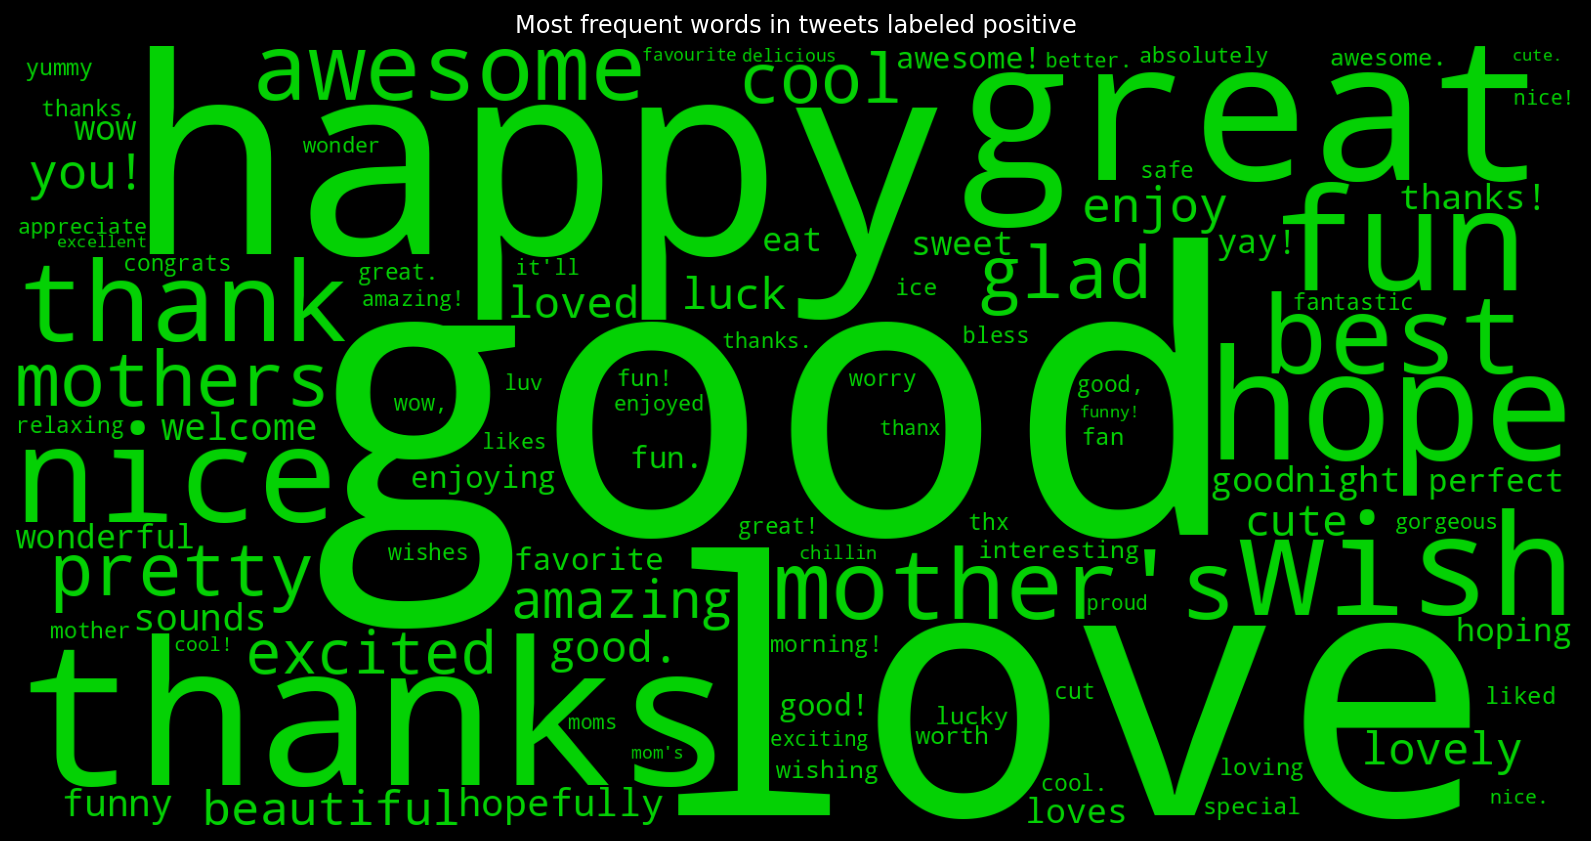

In [105]:
# Generate the positive wordcloud in green
color_func_1 = SimpleColorFunc({'positive': '#04d104'}, '#000000')

plot_word_cloud_dict_colormapped(top_pos_freq,color_func_1,'Most frequent words in tweets labeled positive')

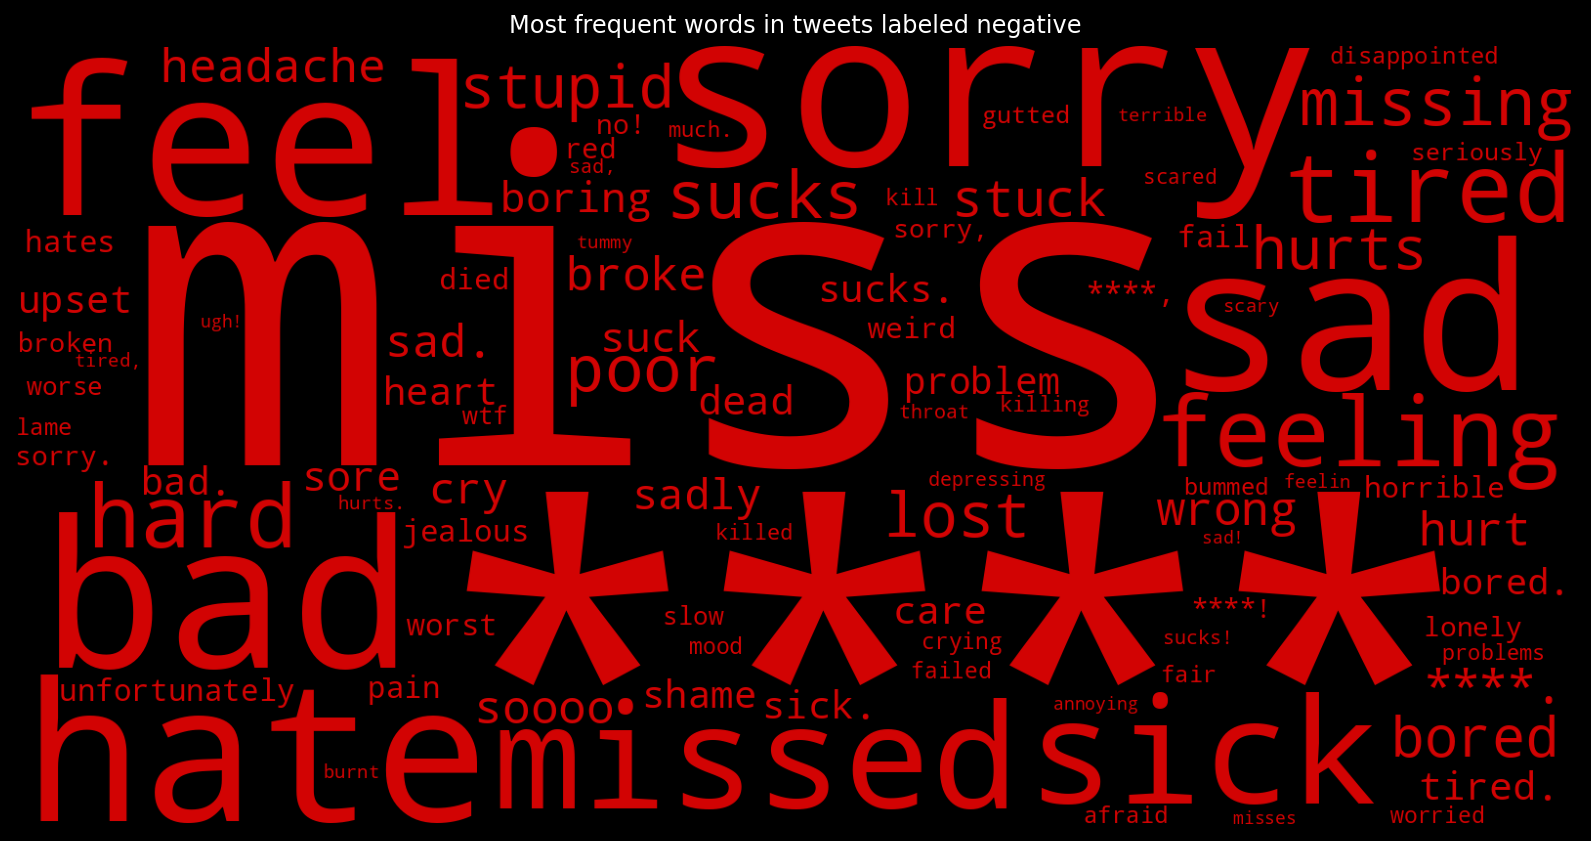

In [107]:
# Generate the negative wordcloud in red
color_func_2= SimpleColorFunc({'negative': '#d20303'}, '#000000')

plot_word_cloud_dict_colormapped(top_neg_freq, color_func_2, 'Most frequent words in tweets labeled negative')

## Sentiment proportions

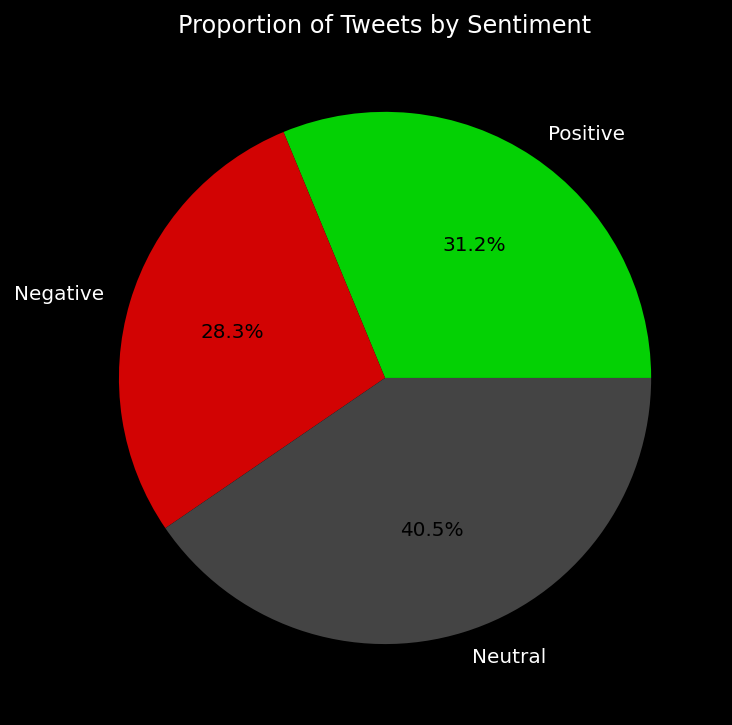

In [58]:
# Pie chart - proportions of sentiment
used_percent = []
cats = ['positive', 'negative','neutral']
for x in cats:
  used_percent.append(100*len(df[df['sentiment'] == x])/len(df))
plt.style.use("dark_background")
plt.figure(figsize=(6,6))

def func(pct):
    return f"{pct:.1f}%"

# https://stackoverflow.com/questions/27898830/python-how-to-change-autopct-text-color-to-be-white-in-a-pie-chart
_, _, autotexts = plt.pie(labels=['Positive','Negative','Neutral'],x=used_percent, autopct=func, colors=label_colors.values())
for autotext in autotexts:
    autotext.set_color('black')

plt.title('Proportion of Tweets by Sentiment')
plt.show()